<a href="https://colab.research.google.com/github/Thuoq/Machine-Learning-Basic/blob/main/Endgame_ML_K1N2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project Final K1_N2 Teacher: Tu Anh
 
* Classification mnist 

**Created**: Lê Văn Thương, Lê Văn Kiên, Nguyễn Trung Phong, Nguyễn Thị Thu Hường.

In [2]:
#import libaries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow_datasets as tfds

## Fetching dataset from Sklearn

In [3]:
# Fetching dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [4]:
X,y = mnist['data'],mnist['target'] # X for features, y for labels
X.shape,y.shape

((70000, 784), (70000,))

In [5]:
X[0].shape

(784,)

**NOTE**: Một chút khác biệt fetching data giữa **Tensorflow** và **Sklearn**:
- shape đưa ra của **X** ở Sklearn là 784 features có nghĩa trải ngang ra còn ở tensorflow là (28,28(

## Viz Dataset 

Xây dựng 1 hàm có tên là `show_a_image()` để chỉ ra cái ảnh đầu vào của dữ liệu: 

In [ ]:
def show_a_image(some_digit):
  """
  @param some_digit: (np.array) have shape (784)
  """
  some_digit_image = some_digit.reshape((28,28))
  plt.imshow(some_digit_image,cmap="binary")
  plt.axis("off")
  plt.show()


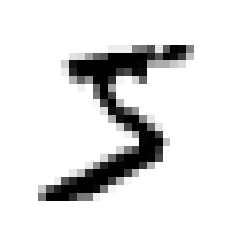

'5'

In [ ]:
show_a_image(X[0]);
y[0]

Ở trên chúng ta đã thấy tại bức ảnh vị trí 0 và label ở vị trí 0 là 5. Nhưng có 1 điều ở đây rằng label đang là kiểu **string** hầu như các thuật toán của ML đều xử lý với số nên chúng ta sẽ convert label sang number 

In [6]:
y  = y.astype(np.uint8)

Ở trên chúng ta chỉ mới Viz cho 1 hình ảnh đoạn code dưới đây sẽ làm show  **random 4 images**.

In [ ]:
import random
def show_4_images_rand(X,y):
  """
  @param X: for features
  @param y: label
  Show random 4 images
  """
  plt.figure(figsize=(7,7))
  for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_idx = random.choice(range(len(X)))
    plt.imshow(X[rand_idx].reshape((28,28)),cmap="binary")
    plt.title(y[rand_idx])
    plt.axis(False)
    

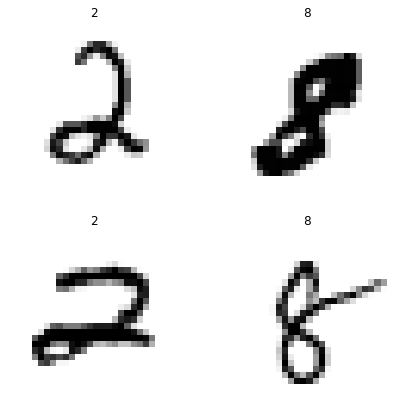

In [ ]:
show_4_images_rand(X,y)

## Data Processing 


### Features Scaling 
Trong phần này chúng ta sẽ xử lý dữ liệu và chúng ta sẽ sử dụng 1 trong  các kỹ thuật trong Features Scaling là : 
1. Max scaling ( được biết đến như là normalization)
2. Standardization

**Max Scaling** nó rất đơn giản giá trị được dịch chuyển và thay đổi tỷ lệ để chúng kết thúc từ 0 tới 1 công thức là: trừ giá trị thấp nhất và chia giá trị cao nhất. Trong Sckit-learn là **MinMaxScaler**

**Standardization**: là khác biệt đầu tiên nó trừ đi giá trị trung bình và chia nó cho dộ lệch chuẩn 


1 điểm chút khác biệt giữa 2 thằng kể trên: 
- Thằng **standardization** không bị ràng buộc vào phạm vi cụ thể nào như thằng **min-max**
- **standardization** nó ít bị ảnh hưởng bởi giá trị ngoại biên

Dưới đây chúng tôi sẽ sử dụng thằng **StandardScaler** và **Minmax Scaling** để preprocessing data.

In [7]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler() # standardization 
_min_max = MinMaxScaler() # normalization
X_standardization = scaler.fit_transform(X.astype(np.float64))
X_normalization = _min_max.fit_transform(X.astype(np.float64))


### Split Data 

Trong phần này mình sẽ chia dữ liệu mà mình đã features scaling ở trên  của chúng ta thành 2 phần với **80%** và **20%**:

1. Train Data - (80%)
2. Test Data - (20%)

Trong **Scikit-learn** có 1 hàm là `train_test_split()` để xử lý điều trên.

In [8]:
from sklearn.model_selection import train_test_split
# X_stand_train là của X_standardization
X_stand_train,X_stand_test,y_train,y_test = train_test_split(X_standardization
                                                             ,y
                                                             ,random_state=42
                                                             ,test_size=0.2)
# X_norm_train là của X_normalization
X_norm_train,X_norm_test,y_train,y_test = train_test_split(X_normalization
                                                             ,y
                                                             ,random_state=42
                                                             ,test_size=0.2)


## Sử dụng Model để Training data.
Trong phần này bọn mình sẽ sử dụng 2 thuật toán **Support Vector Machines** và **Random Forests**. 

Trước khi đi vào phần code thì mình sẽ giải thích ý nghĩa của 2 thuật toán trên và code nó ở ngay sau khi giải thích xong. 

### Support Vector Machines (SVM) 



#### Linear SVM Classification 

SVM hay còn được gọi là **Maximum Margin Classifier** để giải thích nó sẽ làm gì thì mình sẽ xin đưa ra 1 hình ảnh này để mọi người nhìn thấy. 


![Image SVM ](https://machinelearningcoban.com/assets/19_svm/svm2.png "Text to show on mouseover")

![Image SVM ](https://machinelearningcoban.com/assets/19_svm/svm5.png "Text to show on mouseover")

Chúng ta có 1 đường thẳng để tách biệt giữa 2 lớp **xanh** và **đỏ** và bài toán SVM là làm sao để tìm được cái *margin* lớn nhất có thể để làm tách biệt 2 lớp này ra. 

#### Nonlinear SVM Classification 

Mặc dù Linear SVM classificaiton sử dụng rất hiệu quả và làm việc rất tốt với trong nhiều trường hợp dataset. Nhưng sẽ có những trường hợp dữ liệu sẽ không là **linearly**. Và với nhũng trường hợp dữ liệu này chúng ta sẽ sử dụng các  hướng tiếp cận sau : 
1. Polynomial Features
2. Polynomial Kernel
3. Similarity Features
4. Gaussian RBF Kernel


##### Polynomial Featues 


**Polynomial Features** được hiểu như là mình sẽ ví dụ tập dữ liệu của mình đang là bậc 1, mình sẽ cho nó lên bậc 2,3 và mình sẽ sử dụng được linear cho trường hợp đó.  như hình ở dưới sẽ mô tả rõ ràng hơn.


![Image SVM ](https://img2018.cnblogs.com/blog/1012590/201903/1012590-20190331181001911-2004060929.png "Text to show on mouseover")

In [9]:
# This site error huhu 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
polynomial_features_svm_clf_ = Pipeline([
          ("poly_features",PolynomialFeatures(degree=2)),
        
          ("svm_clf",LinearSVC(C=10,loss="hinge"))
  ])
model_polynomial_features_svm_clf = polynomial_features_svm_clf.fit(X,y)


NameError: ignored

##### Polynomial Kernel

Thêm vào **polynomial features** là chỉ đơn giản và làm việc rất tốt với các thuật toán ML algorithms. phương pháp trên không thể xử lý các bộ dữ liệu rất phức tạp và với mức độ đa thức cao, nó tạo ra một số lượng lớn các features, làm cho model quá chậm.

Từ đó Polynomial Kernel ra đời , nó chỉ đơn giản là sử dụng 1 kỹ thuật là **kernel**. Nói đơn giản là giúp bạn có thể nhận được kết quả giống như khi cái kết quả ở **polynomial features** ngay cả các đat thức bậc cao, vì vậy sẽ không có sự thêm về mặt features ở đây nữa. 

In [10]:
from sklearn.svm import SVC
# This for data norm
polynomial_kernel_svm_clf_norm = SVC(kernel="poly")
polynomial_kernel_svm_clf_norm.fit(X_norm_train,y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
# This for data stand
polynomial_kernel_svm_clf_stand = SVC(kernel="poly")
polynomial_kernel_svm_clf_stand.fit(X_stand_train,y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

##### Similarity Featues 
Một kỹ thuật khác sử dụng để khi có **nonlinear problems** là thêm 1 **features** bằng 1 function có tên là **similarity function** có tên thường sử dụng nhất là **Gausian RBF Kernel** giải thích sẽ rõ khi được nhìn ở hình phía dưới. 

![Image SVM ](https://img2018.cnblogs.com/blog/1012590/201903/1012590-20190331214259024-184633268.png "Text to show on mouseover")

###### Gausian RBF Kernel 

Công thức cửa **RBF Kernel** là:
  $$ϕ_γ(x, ℓ) =exp (−γ∥x − ℓ∥^2)$$

In [12]:
# This for data norm 
rbf_kernel_svm_clf_norm = SVC(kernel="rbf")               
rbf_kernel_svm_clf_norm.fit(X_norm_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
rbf_kernel_svm_clf_stand = SVC(kernel="rbf")
rbf_kernel_svm_clf_stand.fit(X_stand_train,y_train)

### RandomForest 
Trước hết để hiểu được random forest thì chúng ta sẽ đi tìm hiểu về 1 kỹ thuật có tên gọi là **Bagging** và **Pasting**

#### Bagging vs Pasting 
**Bagging** và **Pasting** đều là 1 kỹ thuật để tạo ra nhiều loại tập huấn liệu con.
**Bagging**, viết tắt của (**bootstrap aggregating**) tạo ra một tập dữ liệu bằng cách lấy mẫu tập huấn luyện với sự thay thế. **Pasting** tạo tập dữ liệu bằng cách lấy mẫu tập huấn luyện mà không cần thay thế.

### Random Forest 
**Random Forest** là tâp hợp của các **Decision Tree** được huấn luyện bởi các tập dữ liệu tạo ra  bằng phương pháp **Bagging vs Pasting** 

#### Implementaion Random Forest with Scikit-Learn

In [ ]:
# This for data norm
from sklearn.ensemble import RandomForestClassifier
rnd_clf_norm = RandomForestClassifier()
rnd_clf_norm.fit(X_norm_train, y_train)


In [ ]:
# This for data stand
from sklearn.ensemble import RandomForestClassifier
rnd_clf_stand = RandomForestClassifier()
rnd_clf_stand.fit(X_stand_train, y_train)


## Evaluation Model
Trong phần này chúng ta sẽ đánh giá những model mà chúng ta đã làm ở trên và sử dụng 1 vài những công cụ  để đánh giá model classification theo nhiều cách khác nhau

1. Cross-Validation
2. Confusion Matrix
3. Precision and Recall
4. F-1 Score 
5. ROC Curve




### Summary Model Trained Above


### Cross-Validation 

Cross-Validation là dữ liệu train sẽ chia ra làm **K-fold** ngẫu nhiên nhằm cho model có tính ngẫu nhiên khi train 1 tập dữ liệu, xong rồi dự đoán và đánh giá chúng theo từng K-fold sử dụng model.

Trong Scitlearn thì nó có tên gọi là khác là `cross_val_score()`

In [6]:
from sklearn.model_selection import cross_val_score

In [ ]:
def average_val_score(model_stand,model_norm,X_norm_train,X_norm_test,X_stand_train,X_stand_test,y_train,y_test):
  val_score_train_stand = sum(cross_val_score(model_stand,X_stand_train,y_train,cv=3,scoring="accuracy"))/3;

  val_score_test_stand = sum(cross_val_score(model_stand,X_stand_test,y_test,cv=3,scoring="accuracy"))/3;

  val_score_train_norm = sum(cross_val_score(model_norm,X_norm_train,y_train,cv=3,scoring="accuracy"))/3;

  val_score_test_norm = sum(cross_val_score(model_norm,X_norm_test,y_test,cv=3,scoring="accuracy"))/3
  print(f"This is train_stand accuracy {val_score_train_stand}")
  print(f"This is test_stand accuracy {val_score_test_stand}")
  print(f"This is train_norm accuracy {val_score_train_norm}")
  print(f"This is test_norm accuracy {val_score_test_norm}") 

In [ ]:
average_val_score(polynomial_kernel_svm_clf_norm,polynomial_kernel_svm_clf_stand,X_norm_train, X_norm_test,X_stand_train,X_stand_test,y_train,y_test)

In [ ]:
average_val_score(rbf_kernel_svm_clf_norm,rbf_kernel_svm_clf_stand,X_norm_train, X_norm_test,X_stand_train,X_stand_test,y_train,y_test)

In [ ]:
average_val_score(rnd_clf_norm,rnd_clf_stand,X_norm_train, X_norm_test,X_stand_train,X_stand_test,y_train,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
#this polynomial_kernel_svm_clf_norm for Testing data 
cross_val_score(polynomial_kernel_svm_clf_norm,X_norm_test,y_test,cv=3,scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_score
#this polynomial_kernel_svm_clf_norm for Testing data 
cross_val_score(polynomial_kernel_svm_clf_norm,X_norm_train,y_train,cv=3,scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_score
#this rbf_kernel_svm_clf_norm for training data 
cross_val_score(rbf_kernel_svm_clf_norm,X_norm_test,y_test,cv=3,scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_score
#this rbf_kernel_svm_clf_norm for training data 
cross_val_score(rbf_kernel_svm_clf_norm,X_norm_train,y_train,cv=3,scoring="accuracy")

In [22]:
from sklearn.model_selection import cross_val_score
#this rbf_kernel_svm_clf_stand for training data 
cross_val_score(rbf_kernel_svm_clf_stand,X_stand_train,y_train,cv=3,scoring="accuracy")

array([0.96035785, 0.96292923, 0.95987357])

In [23]:
from sklearn.model_selection import cross_val_score
#this rbf_kernel_svm_clf_stand for testing data 
cross_val_score(rbf_kernel_svm_clf_stand,X_stand_test,y_test,cv=3,scoring="accuracy")

array([0.93936147, 0.93379044, 0.94170596])

In [ ]:
#this random forest for  training data and random forest stand
cross_val_score(rnd_clf_stand,X_stand_train,y_train,cv=3,scoring="accuracy")

In [18]:
#this random forest for test data and random forest stand
cross_val_score(rnd_clf_stand,X_stand_test,y_test,cv=3,scoring="accuracy")

array([0.94600386, 0.94428969, 0.94727818])

In [21]:
from sklearn.model_selection import cross_val_score
# This random forest for training data and random frest norrm
cross_val_score(rnd_clf_norm,X_norm_train,y_train,cv=3,scoring="accuracy")

array([0.96491134, 0.96689345, 0.96507018])

In [20]:
from sklearn.model_selection import cross_val_score
# This random forest for test data and random forest norrm
cross_val_score(rnd_clf_norm,X_norm_test,y_test,cv=3,scoring="accuracy")

array([0.94536105, 0.94600386, 0.94599228])

### Confusion Matrix
1 cách khác để nhìn vào **performance** của 1 classifier là nhìn vàon **confusion matrix**. Ý tưởng của cái bảng này là đếm số lần của trường hợp là ở lớp A nhưng model lại phân loại thành lớp B.

Ví dụ để biết xem xem bao nhiêu lần model phân loại sai(confused) hình ảnh là 5 với 3 thì chúng ta sẽ nhìn vào hàng 5 cột 3 ở **confusion matrix**

![Image SVM ](https://ongxuanhong.files.wordpress.com/2015/08/confusion-matrix2.png "Text to show on mouseover")

### Precision and Recall 

### F-1 Score

### ROC Curve 

## Find-Tunning Model using Gird Search 



### Gird Search 

Như các bạn đã thấy ở trên việc tìm ra những **best_hyparameter** rất là khó và khó để tìm ra được đôi lúc 1 vài model có rất nhiều hyparameter vậy để tìm tổ hợp của chúng là hết sức khó khăn. Vì thế Gird Search sinh ra là để chạy cái tổ hợp đó cho bạn. 

Trong Scikit-Learn thì nó được gọi là **GridSearchCV**

## Using ANN Architecture 

## Sumarry 